# Examples
This Notebook includes examples of the use of the Framework. This along with the READ ME on the Github Repository should give you a good introduction into the Framework.

---

## Simple Toy Text Example - Frozen Lake
In this simple example the agent can move left, right, up or down in a little grid world where the aim is to reach the other side of frozen lake.

(Source: [Frozen Lake Open Ai Gym](http://gym.openai.com/envs/FrozenLake-v0/))\
The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. The agent is rewarded for finding a walkable path to a goal tile.

* SFFF       (S: starting point, safe)
* FHFH       (F: frozen surface, safe)
* FFFH       (H: hole, episode termination)
* HFFG       (G: goal, episode termination)

### Creating a Q-Table and filling it with Q-Values (Training the Agent)
Training Loop to find the Q-Values and save them in a Q-Table to be used in future to traverse the frozen lake.

If you want to train the Agent quickly without having the actions displayed each time comment out following statements:
* `clear_output(wait=True)`
* `print("*** Episode: ", episode)`
* `Environment.env.render()`
* `time.sleep(0.1)`

And in the if done loop:
* `print("*** Total Reward Received: ", reward)`
* `time.sleep(1)`

In [16]:
import time, pickle, os
from Modules import RL_Environments
from Modules import Agents
from IPython.display import clear_output

total_episodes = 200
max_steps = 400


Environment = RL_Environments.FrozenLake('FrozenLake-v0')
Agent = Agents.QlearningAgent(Environment.n_states, Environment.n_actions, epsilon = 0.9, lr_rate = 0.81, gamma = 0.96)

# Loop for each Episode
for episode in range(total_episodes):
    state = Environment.env.reset()
    t = 0
    
    # Loop for each action, if the done flag is set, break
    while t < max_steps:
        #clear_output(wait=True)
        #print("*** Episode: ", episode)
        #Environment.env.render()
        #time.sleep(0.1)
        action = Agent.choose_action(state)  
        if action == "random":
            action = Environment.env.action_space.sample()
        state2, reward, done, info = Environment.env.step(action)
        #print(state2, reward, done, info)
        Agent.learn(state, state2, reward, action)

        state = state2
        t += 1
        
        if done:
            #print("*** Total Reward Received: ", reward)
            #time.sleep(1)
            break
    #print(Agent.Q)
    #time.sleep(2)
print("Agent Q-Table")
print(Agent.Q)

with open("Training/FrozenLakeQ.pkl", 'wb') as f:
    pickle.dump(Agent.Q, f)
    f.close()

Agent Q-Table
[[0.78260355 0.81459582 0.81521843 0.78246691]
 [0.78257906 0.         0.8491859  0.81518647]
 [0.81521812 0.88456868 0.73755276 0.84918151]
 [0.84324322 0.         0.77980652 0.73755276]
 [0.81320528 0.84862479 0.         0.78254081]
 [0.         0.         0.         0.        ]
 [0.         0.92143055 0.         0.83329477]
 [0.         0.         0.         0.        ]
 [0.8458953  0.         0.88431476 0.78342019]
 [0.         0.60463331 0.92122833 0.        ]
 [0.52557278 0.95998413 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.9253301  0.        ]
 [0.         0.92530047 0.9999983  0.92030995]
 [0.         0.         0.         0.        ]]


### Using the Training to move over the frozen lake
This uses the previously determined Q-Table to traverse the frozen lake. So here the Agent does not explore the environment anymore, but just follows the max values in the Q-Table from each given state.

In [17]:
import gym
import numpy as np
import time
import pickle, os
from Modules import RL_Environments
from IPython.display import clear_output

Environment = RL_Environments.FrozenLake('FrozenLake-v0')

with open("Training/FrozenLakeQ.pkl", 'rb') as f:
    Q = pickle.load(f)

def choose_action(state):
    action = np.argmax(Q[state, :])
    return action

# Loop for each episode
for episode in range(5):

    state = Environment.env.reset()
    t = 0
    
    # Loop for each action, if the done flag is set, break
    while t < 400:
        clear_output(wait=True)
        print("*** Episode: ", episode)
        Environment.env.render()

        action = choose_action(state)

        state2, reward, done, info = Environment.env.step(action)  
        state = state2
        
        if done:
            print("*** Total Reward Received: ", reward)
            time.sleep(1)
            break
        
        time.sleep(0.2)
        os.system('clear')

*** Episode:  4
  (Down)
SFFF
FHFH
FFFH
HFFG
*** Total Reward Received:  1.0


---

## More Complex Toy Text Example - Taxi
(Source: [Taxi Open Ai Gym](http://gym.openai.com/envs/Taxi-v3/))\
There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.

The Taxi needs to pickup the passenger at the blue letter and drop off at the pink letter.

### Training Loop
Training Loop to find the Q-Values and save them in a Q-Table to be used to Play the Taxi game.

If you want to train the Agent quickly without having the actions displayed each time comment out following statements:
* `clear_output(wait=True)`
* `print("*** Episode: ", episode)`
* `Environment.env.render()`
* `time.sleep(0.05)`

And in the if done loop:
* `print("*** Total Reward Received: ", reward)`
* `time.sleep(1)`

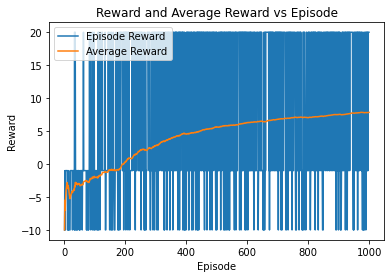

Agent Q-Table
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 3.72076987  4.91746862  3.72076987  4.91746862  6.16402981 -4.08253138]
 [ 8.81513651 10.22410054  8.81513651 10.22410054 11.69177139  1.22410054]
 ...
 [11.69177139 13.2205952  11.69177139 10.22410054  2.69177139  2.69177139]
 [ 6.16402981  7.46253105  6.16402981  7.46253105 -2.83597019 -2.83597019]
 [16.472      14.81312    16.472      18.2         7.472       7.472     ]]
(500, 6)


In [9]:
import time, pickle, os
from Modules import RL_Environments
from Modules import Agents
from IPython.display import clear_output
from Modules import Visualization as Vis

best_reward = 0
average_reward = 0
Reward_plot = Vis.Plotting()

total_episodes = 1000
max_steps = 400


Environment = RL_Environments.Taxi('Taxi-v3')
Agent = Agents.QlearningAgent(Environment.n_states, Environment.n_actions, epsilon = 0.9, lr_rate = 0.81, gamma = 0.96)

# Start
for episode in range(1, total_episodes):
    state = Environment.env.reset()
    t = 0
    score = 0
    while t < max_steps:
        #clear_output(wait=True)
        #print("*** Episode: ", episode)
        #Environment.env.render()
        #time.sleep(0.05)
        action = Agent.choose_action(state)  
        if action == "random":
            action = Environment.env.action_space.sample()
        state2, reward, done, info = Environment.env.step(action)
        Agent.learn(state, state2, reward, action)

        state = state2
        t += 1
        if done:
            #print("*** Total Reward Received: ", reward)
            #time.sleep(1)
            Reward_plot.add_data(episode, reward)
            break
    
Reward_plot.plot_reward()
print("Agent Q-Table")
print(Agent.Q)
print(Agent.Q.shape)

with open("Training/TaxiQ.pkl", 'wb') as f:
    pickle.dump(Agent.Q, f)
    f.close()

This problem already makes it difficult to follow the Q-Table anymore, since the State-Space becomes larger and the environment can't be represented by one singular gridworld anymore. Due to having different pickup and dropoff locations, more representations are needed. As can be seen from the Q-Table shape, there are 500 states to this problem, eventhough  the Grid World is a 5 x 5 Matrix.

### Using the Training

*** Episode:  4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
*** Total Reward Received:  20


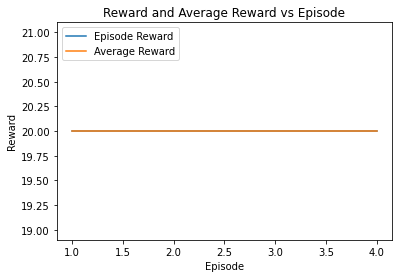

In [10]:
import gym
import numpy as np
import time
import pickle, os
from IPython.display import clear_output
from Modules import Visualization as Vis

best_reward = 0
average_reward = 0
Reward_plot = Vis.Plotting()

env = gym.make('Taxi-v3')

with open("Training/TaxiQ.pkl", 'rb') as f:
    Q = pickle.load(f)

def choose_action(state):
    action = np.argmax(Q[state, :])
    return action

# start
for episode in range(1, 5):
    state = env.reset()
    t = 0
    while t < 400:
        clear_output(wait=True)
        print("*** Episode: ", episode)
        env.render()
        time.sleep(0.2)
        action = choose_action(state)

        state2, reward, done, info = env.step(action)  
        state = state2
        if done:
            print("*** Total Reward Received: ", reward)
            Reward_plot.add_data(episode, reward)
            break
    Reward_plot.plot_reward()
    time.sleep(1)
    os.system('clear')

---

## General Environment Setup and Visualisation on a Server
To Display Open Ai Gym on the Pixelflux Servers a Virtual Display is needed in order for the visual output of Open Ai Gym, which can then be plotted in Matplotlib.

The normal render() function uses the pyglet package, which needs RGB color inputs from a screen (or display) that is not present on the server. Therefore, you have to add a virtual screen to the server for it to record your inputs in this remote server setup.

In [2]:
pip install gym[box2d] #This needs to be run if you want to Display the LunarLander Example

Note: you may need to restart the kernel to use updated packages.


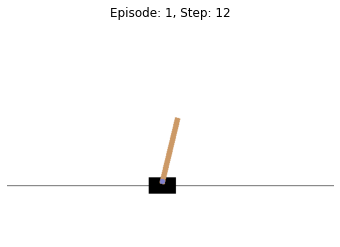

In [18]:
# Imports
import gym
import random
import matplotlib.pyplot as plt
from Modules import Visualization as Vis


#Create the gym environment
'''
Example Environemnts: (copy the name and use it as input to gym.make())
env = gym.make('MountainCar-v0')
env = gym.make('CartPole-v0')
env = gym.make('LunarLander-v2')
'''
env = gym.make('CartPole-v0')

#Start the virtual display
display = Vis.start_display()

#Reset the environment and render the inital state
state = env.reset()
plot = plt.imshow(env.render(mode='rgb_array'))

#Episode Loop
for j in range(400):
    #Take a random action in the environment
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    
    #Display the new State
    Vis.output_frame(env.render(mode='rgb_array'), display, plot, 1, j)
    
    #if the done flag is set the episode is terminated
    if done:
        plt.close() #Closing the Plot and creating a new one for each new Episode
        break 
env.close()

## The Cart Pole Problem
(Source: [CartPole Open Ai Gym](https://gym.openai.com/envs/CartPole-v0/))\
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

---

## Using Neural Networks to Estimate the Q-Function

In deep Q-learning (DQN) a neural network is taken to approximate the Q-function. The neural network has as input the state representation and as output the different actions, that the agent can take. The Reward is used in training for back-propagation to update the weights and biases of the neural network to provide a better estimate of the Q-function.


## DQN with Observations as Inputs
(Source: [Reinforcement Learning: DQN w Pytorch](https://andrew-gordienko.medium.com/reinforcement-learning-dqn-w-pytorch-7c6faad3d1e) and [Cart Pole Open AI Gym](https://gym.openai.com/envs/CartPole-v0/))\
As we saw in the last example it becomes more and more difficult to keep all the states stored in a Table and with it represent the optimal Q-Function. In the following Problem a Pole needs to be balanced on a Cart. The Agent can either move the Cart Left or Right Based on an Observation Vector(which represents the State) with Information about the Pole(Angel and Velocity) and the Cart(Position and Velocity). With these Observations there are a lot of different states that would need to be incorporated in a Table to solve the problem. It is easier to start estimating the Q-Function, this is done with a Neural Network with the Observations as Input and the Actions as Output.


Here Deep Q-Learning(Q-Learning in conjunction with a Neural Network is used) the Network Dimensions are predefined in the Agents.py DQNAgent_observations class.

If you do not want to display the Episode Render each time just comment out the line 
* `Vis.output_frame(env.render(mode='rgb_array'), display, plot, i, step_count)`

With the `torch.save(Agent.network.state_dict(), "Training/DQN_Observations.pth.tar")` command the Trained Neural Network Parameters are saved in the Training Folder which can be loaded again and used to play the game to see how well our training performed.

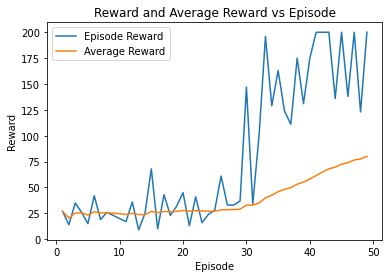

Complete


In [3]:
import time, pickle, os
import math
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

from Modules import RL_Environments
from Modules import Agents
from Modules import Visualization as Vis

# Declaring Variables
EPISODES = 50
MEM_SIZE = 5000
BATCH_SIZE = 64
GAMMA = 0.95
EXPLORATION_MAX = 1.0
EXPLORATION_DECAY = 0.999
EXPLORATION_MIN = 0.001

best_reward = 0
average_reward = 0
Reward_plot = Vis.Plotting()

# Starting Virtual Display for Inline Visualization
display = Vis.start_display()

# Creating Environemnt and Agent
env = gym.make('CartPole-v0')

Agent = Agents.DQNAgent_observations(EXPLORATION_MAX, EXPLORATION_DECAY, EXPLORATION_MIN, env, MEM_SIZE, BATCH_SIZE, GAMMA)

observation_space = env.observation_space.shape[0]
action_space = env.action_space.n

for i in range(1, EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, observation_space])
    score = 0
    plot = plt.imshow(env.render(mode='rgb_array'))
    step_count = 0
    while True:
        step_count += 1
    #Render running local
        #env.render()
        
    #Running on server
        #Display the new State
        Vis.output_frame(env.render(mode='rgb_array'), display, plot, i, step_count)
        
        
        action = Agent.choose_action(state)
        state_, reward, done, info = env.step(action)
        state_ = np.reshape(state_, [1, observation_space])
        Agent.memory.add(state, action, reward, state_, done)
        Agent.learn()
        state = state_
        score += reward

        if done:
            if score > best_reward:
                best_reward = score
            average_reward += score 
            print("Episode {} Average Reward {} Best Reward {} Last Reward {}".format(i, average_reward/i, best_reward, score))
            Reward_plot.add_data(i, score)
            plt.close()
            break
    display.clear_output(wait=True)
    Reward_plot.plot_reward()
    time.sleep(1)
    
print('Complete')
torch.save(Agent.network.state_dict(), "Training/DQN_Observations.pth.tar")
env.close()

## Using the Training

The previously saved network parameters get loaded to an agent and used to see how succesfull our training was.

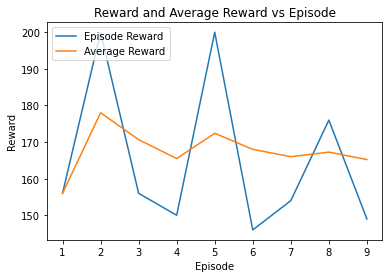

Complete


In [4]:
import time, pickle, os
import math
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

from Modules import RL_Environments
from Modules import Agents
from Modules import Visualization as Vis

# Declaring Variables
EPISODES = 10
MEM_SIZE = 10
BATCH_SIZE = 64
GAMMA = 0.95
EXPLORATION_MAX = 0
EXPLORATION_DECAY = 0
EXPLORATION_MIN = 0

best_reward = 0
average_reward = 0
Reward_plot = Vis.Plotting()

# Starting Virtual Display for Inline Visualization
display = Vis.start_display()

# Creating Environemnt and Agent
env = gym.make('CartPole-v0')

Agent = Agents.DQNAgent_observations(EXPLORATION_MAX, EXPLORATION_DECAY, EXPLORATION_MIN, env, MEM_SIZE, BATCH_SIZE, GAMMA)
Agent.network.load_state_dict(torch.load( "Training/DQN_Observations.pth.tar"))

observation_space = env.observation_space.shape[0]
action_space = env.action_space.n


for i in range(1, EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, observation_space])
    score = 0
    plot = plt.imshow(env.render(mode='rgb_array'))
    step_count = 0
    while True:
        step_count += 1
    #Render running local
        #env.render()
        
    #Running on server
        #Display the new State
        Vis.output_frame(env.render(mode='rgb_array'), display, plot, i, step_count)
        
        action = Agent.choose_action(state)
        state_, reward, done, info = env.step(action)
        state_ = np.reshape(state_, [1, observation_space])
        state = state_
        score += reward

        if done:
            if score > best_reward:
                best_reward = score
            average_reward += score 
            print("Episode {} Average Reward {} Best Reward {} Last Reward {}".format(i, average_reward/i, best_reward, score))
            Reward_plot.add_data(i, score)
            plt.close()
            break
    display.clear_output(wait=True)
    Reward_plot.plot_reward()
    time.sleep(1)
print('Complete')
env.close()

---

## DQN with Pixel Data
(Source: [REINFORCEMENT LEARNING (DQN) TUTORIAL](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html))\
But what is to be done if the agent does not recieve a nicely defined Observations Vector from the environment? One could start using Pixel Data as a State Representation. Some functionality is added to the RL_Environments To get the pixel data from Open Ai Gym and to proccess it a bit to make it more usable.

torch.Size([1, 3, 40, 60])


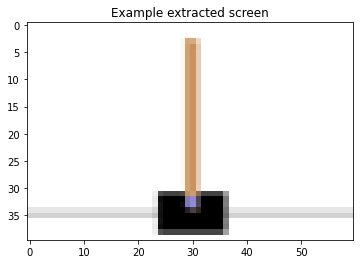

In [4]:
import gym
import time
from itertools import count
import torch
import matplotlib.pyplot as plt

from Modules import RL_Environments
from Modules import Agents
from Modules import Visualization as Vis

# Starting Virtual Display for Inline Visualization
display = Vis.start_display()

env = RL_Environments.CartPole('CartPole-v0', display, image_observation = True)
#env = gym.make('CartPole-v0').unwrapped

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(env.get_screen().shape)
plt.figure()
plt.imshow(env.get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()

When determining the state using the pixel data we use two of these frames and subtract them from each other in order to recieve information about the movement of the pole and cart.

---
## Training Loop

If you do not want to display the Episode Render each time just comment out the line 
* `Vis.output_frame(env.render(mode='rgb_array'), display, plot, i, step_count)`

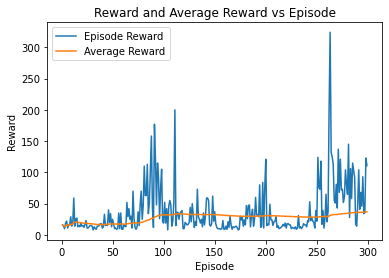

Complete


In [20]:
import gym
import time
from itertools import count
import torch
import matplotlib.pyplot as plt

from Modules import RL_Environments
from Modules import Agents
from Modules import Visualization as Vis

best_reward = 0
average_reward = 0
Reward_plot = Vis.Plotting()

# Starting Virtual Display for Inline Visualization
display = Vis.start_display()

env = RL_Environments.CartPole('CartPole-v1', display, image_observation = True)

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 1
EPS_END = 0.05
EPS_DECAY = 0.996
TARGET_UPDATE = 10

num_episodes = 300
steps_done = 0

Agent = Agents.DQNAgent_image(EPS_START, EPS_DECAY, EPS_END, env, BATCH_SIZE, GAMMA)

for i in range(1, num_episodes):
    # Initialize the environment and state
    env.env.reset()
    plot = plt.imshow(env.env.render(mode='rgb_array'))
    last_screen = env.get_screen()
    current_screen = env.get_screen()
    state = current_screen - last_screen
    score = 0
    
    for t in count():
        # Select and perform an action
        action = Agent.select_action(state, steps_done)
        steps_done += 1
        _, reward, done, _ = env.env.step(action.item())
        reward = torch.tensor([reward], device=device)
        
        #Vis.output_frame(env.env.render(mode='rgb_array'), display, plot, i, t)
        
        # Observe new state
        last_screen = current_screen
        current_screen = env.get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # Store the transition in memory
        Agent.memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state
        score += reward
        
        # Perform one step of the optimization (on the policy network)
        Agent.optimize_model()
        if done:
            if score > best_reward:
                best_reward = score
            average_reward += score 
            print("Episode {} Average Reward {} Best Reward {} Last Reward {}".format(i, int(average_reward/i), int(best_reward), int(score)))
            Reward_plot.add_data(i, score)
            plt.close()
            break
    display.clear_output(wait=True)
    Reward_plot.plot_reward()
    # Update the target network, copying all weights and biases in DQN
    if i % TARGET_UPDATE == 0:
        Agent.target_net.load_state_dict(Agent.policy_net.state_dict())
        torch.save(Agent.policy_net.state_dict(), "Training/DQN_Image.pth.tar")
        
print('Complete')
torch.save(Agent.policy_net.state_dict(), "Training/DQN_Image.pth.tar")
env.env.close()

---

Episode 9 Average Reward 38 Best Reward 107 Last Reward 18


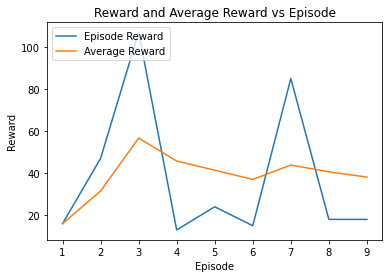

Complete


In [23]:
import gym
import time
from itertools import count
import torch
import matplotlib.pyplot as plt

from Modules import RL_Environments
from Modules import Agents
from Modules import Visualization as Vis

best_reward = 0
average_reward = 0
Reward_plot = Vis.Plotting()

# Starting Virtual Display for Inline Visualization
display = Vis.start_display()

env = RL_Environments.CartPole('CartPole-v1', display, image_observation = True)

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0
EPS_END = 0
EPS_DECAY = 0
TARGET_UPDATE = 10
episode_durations = []
num_episodes = 10

steps_done = 0

Agent = Agents.DQNAgent_image(EPS_START, EPS_DECAY, EPS_END, env, BATCH_SIZE, GAMMA)
Agent.policy_net.load_state_dict(torch.load( "Training/DQN_Image.pth.tar"))

for i in range(1, num_episodes):
    # Initialize the environment and state
    env.env.reset()
    plot = plt.imshow(env.env.render(mode='rgb_array'))
    last_screen = env.get_screen()
    current_screen = env.get_screen()
    state = current_screen - last_screen
    score = 0
    
    for t in count():
        # Select and perform an action
        action = Agent.select_action(state, steps_done)
        steps_done += 1
        _, reward, done, _ = env.env.step(action.item())
        reward = torch.tensor([reward], device=device)
        
        Vis.output_frame(env.env.render(mode='rgb_array'), display, plot, i, t)
        
        # Observe new state
        last_screen = current_screen
        current_screen = env.get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # Move to the next state
        state = next_state
        score += reward
        if done:
            if score > best_reward:
                best_reward = score
            average_reward += score 
            print("Episode {} Average Reward {} Best Reward {} Last Reward {}".format(i, int(average_reward/i), int(best_reward), int(score)))
            Reward_plot.add_data(i, score)
            plt.close()
            break
    Reward_plot.plot_reward()
print('Complete')
env.env.close()

---

## NEAT
Based on the NEAT Example here: [XOR NEAT Example](https://neat-python.readthedocs.io/en/latest/xor_example.html)\
In the two DQN Examples above, the Neural Network structure is chosen manually and then the Weights and Biases are trained with Q-Learning. Naturally the Question becomes: "Which Network Structure and Network Parameters would solve the Problem optimally?". Luckily, an Algorithm has been developed which takles exactly this question. The so called NEAT (Neuroevolution of augmenting topologies) is an algorithm which tries to solve problems by just changing the structure of multiple different Networks and seeing how they perform while evolving networks that perform well.

The NEAT implemation is done with the neat-python package which already has most of the functionality needed to solve the RL problems of Open Ai Gym.

A config file is used to set all the parameters. This Config File can be found in NEAT_Config. If you want to make changes to it: Open the file and change the wanted parameters then save the file. Be sure to restart the kernel, otherwise changes won't take affect.

To get a more detailed view of what is happening and which genomes are evaluated uncoment the line 'print(genome)' in the eval_genomes function. This will display the genomes in the classic NEAT representation after they have been tested on the environment. At the start set the number of generation quite low so you can see what is going on.

In [1]:
pip install neat-python #make sure to run this everytime you restart your server if you would like to use NEAT

Note: you may need to restart the kernel to use updated packages.


In [3]:
import gym
import time, pickle, os
import neat
import matplotlib.pyplot as plt

from Modules import RL_Environments
from Modules import Agents
from Modules import Visualization as Vis

#Evaluation Function, represents our Agent Environment Interaction previously
def eval_genomes(genomes, config):
    for _, genome in genomes:
        observation = [0, 0, 0, 0]  #Inital observation
        done = False
        net = neat.nn.FeedForwardNetwork.create(genome, config) #Creat net for genome with configs
        genome.fitness = 0  #Starting fitness of 0
        while not done:
            #env.render()   #Render game   
            output = net.activate(observation)  #Getting output from net based on observations
            action = max(output)
            if output[0] == action:
                action = 1
            else:
                action = 0
            
            observation, reward, done, info = env.step(action)  #Performs action
            genome.fitness += reward    #Rewards genome for each turn
        #print(genome)
        env.reset()

env = gym.make('CartPole-v1')
env.reset()
        
local_dir = os.path.dirname("NEAT_Config/config-feedforward.txt")
config_path = os.path.join(local_dir, 'config-feedforward.txt')
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
#p.add_reporter(neat.Checkpointer(5))

# Run for up to x generations.
winner = p.run(eval_genomes, 50)

# show final stats
print('\nBest genome:\n{!s}'.format(winner))

#Save the Winner genome
with open("Training/Neat_winner.pkl", "wb") as f:
    pickle.dump(winner, f)
    f.close()


 ****** Running generation 0 ****** 

Population's average fitness: 11.40000 stdev: 5.81722
Best fitness: 23.00000 - size: (4, 20) - species 1 - id 3
Average adjusted fitness: 0.227
Mean genetic distance 1.626, standard deviation 0.924
Population of 5 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     5     23.0    0.227     0
Total extinctions: 0
Generation time: 0.003 sec

 ****** Running generation 1 ****** 

Population's average fitness: 10.40000 stdev: 2.05913
Best fitness: 14.00000 - size: (4, 20) - species 1 - id 3
Average adjusted fitness: 0.400
Mean genetic distance 1.760, standard deviation 0.782
Population of 5 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1     5     14.0    0.400     1
Total extinctions: 0
Generation time: 0.003 sec (0.003 average)

 ****** Running generation 2 ****** 

Population's average fitness: 10.60000 stdev: 2

## Using the Training
The best Genome after the training is saved and then loaded here and used to play the Cart Pole Problem to see how it does.

In [4]:
import gym
import time, pickle, os
import neat
import matplotlib.pyplot as plt

from Modules import RL_Environments
from Modules import Agents
from Modules import Visualization as Vis


# Load requried NEAT config
local_dir = os.path.dirname("NEAT_Config/config-feedforward.txt")
config_path = os.path.join(local_dir, 'config-feedforward.txt')
config = neat.config.Config(neat.DefaultGenome, 
                                neat.DefaultReproduction, neat.DefaultSpeciesSet, 
                                neat.DefaultStagnation, config_path)

# Unpickle saved winner
with open("Training/Neat_winner.pkl", "rb") as f:
    genome = pickle.load(f)

genome_net = neat.nn.FeedForwardNetwork.create(genome, config)

# Starting Virtual Display for Inline Visualization
display = Vis.start_display()

env = gym.make('CartPole-v1')
env.reset()
    
observation = [0, 0, 0, 0]
score = 0
reward = 0
for i in range(1, 6):
    done = False
    observation = [0, 0, 0, 0]
    step_count = 0
    plot = plt.imshow(env.render(mode='rgb_array'))
        
    while not done:
        step_count += 1
        #Running on server
        Vis.output_frame(env.render(mode='rgb_array'), display, plot, i, step_count)
            
        output = genome_net.activate(observation)
        action = max(output)
        if output[0] == action:
            action = 1
        else:
            action = 0

        observation, reward, done, info = env.step(action)
        score += reward
    plt.close()
    env.reset()

print("Score Over 5 tries:")
print(score/5)
print('\nBest genome:\n{!s}'.format(genome))

Score Over 5 tries:
482.4

Best genome:
Key: 98
Fitness: 478.0
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.123392375516271, response=1.0, activation=abs, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=1.1236866042866906, response=1.0, activation=abs, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-4, 0), weight=0.616346545178964, enabled=True)
	DefaultConnectionGene(key=(-4, 1), weight=-1.1409819426819983, enabled=True)
	DefaultConnectionGene(key=(-3, 0), weight=-2.5193659393371335, enabled=True)
	DefaultConnectionGene(key=(-3, 1), weight=-3.212298992267139, enabled=True)
	DefaultConnectionGene(key=(-2, 0), weight=-0.2635900368818711, enabled=False)
	DefaultConnectionGene(key=(-2, 1), weight=-0.012709004169746851, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=-2.1080739731320595, enabled=True)


---